In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_dq import dq_report
from scipy.stats import chi2_contingency, fisher_exact
from scipy.stats import skew, kurtosis


import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import shap
from sklearn.pipeline import Pipeline
import mlflow

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from mlflow.tracking import MlflowClient
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
air_systems_df = pd.read_csv('../../data/raw/air_system_previous_years.csv')

In [3]:
air_systems_df['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [4]:
1000 / 60000

0.016666666666666666

In [5]:
air_systems_df.replace('na', np.nan, inplace=True)

In [6]:
dqr = dq_report(air_systems_df, html=False, csv_engine="pandas", verbose=1)


    All variables classified into correct types.


/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/1804149499.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dqr = dq_report(air_systems_df, html=False, csv_engine="pandas", verbose=1)


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
class,object,0.000000,0,,,No issue
aa_000,int64,0.000000,36,0.000000,2746564.000000,Column has 5627 outliers greater than upper bound (120419.00) or lower than lower bound(-70917.00). Cap them or remove them.
ab_000,object,77.215000,0,,,"46329 missing values. Impute them with mean, median, mode, or a constant value such as 123., 25 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: float, object,"
ac_000,object,5.558333,3,,,"3335 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ad_000,object,24.768333,3,,,"14861 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ae_000,object,4.166667,0,,,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 333 unique values: Use hash encoding or text embedding to reduce dimension."
af_000,object,4.166667,0,,,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 418 unique values: Use hash encoding or text embedding to reduce dimension."
ag_000,object,1.118333,0,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 154 unique values: Use hash encoding or text embedding to reduce dimension."
ag_001,object,1.118333,1,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 617 unique values: Use hash encoding or text embedding to reduce dimension."
ag_002,object,1.118333,4,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


In [7]:
dqr

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
class,object,0.000000,0,,,No issue
aa_000,int64,0.000000,36,0.0,2746564.0,Column has 5627 outliers greater than upper bound (120419.00) or lower than lower bound(-70917.00). Cap them or remove them.
ab_000,object,77.215000,0,,,"46329 missing values. Impute them with mean, median, mode, or a constant value such as 123., 25 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: float, object,"
ac_000,object,5.558333,3,,,"3335 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ad_000,object,24.768333,3,,,"14861 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
ae_000,object,4.166667,0,,,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 333 unique values: Use hash encoding or text embedding to reduce dimension."
af_000,object,4.166667,0,,,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 418 unique values: Use hash encoding or text embedding to reduce dimension."
ag_000,object,1.118333,0,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 154 unique values: Use hash encoding or text embedding to reduce dimension."
ag_001,object,1.118333,1,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 617 unique values: Use hash encoding or text embedding to reduce dimension."
ag_002,object,1.118333,4,,,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


<Axes: xlabel='ac_000', ylabel='Count'>

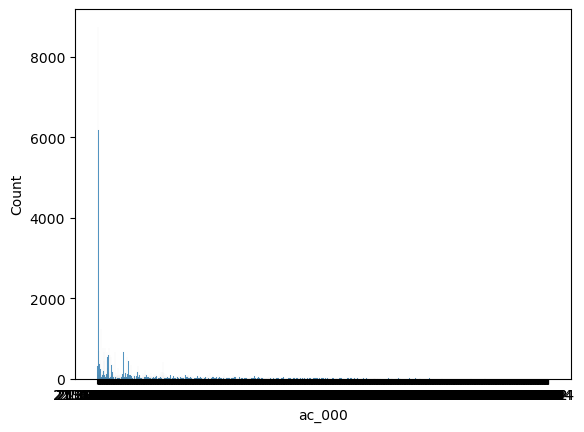

In [8]:
sns.histplot(air_systems_df['ac_000'])

In [9]:
air_systems_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,2161

In [10]:
group_df = air_systems_df.drop(columns='class').isna()

In [11]:
group_df['class'] = air_systems_df['class']

In [12]:
group_df.groupby(by='class').mean()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
neg,0.0,0.772169,0.048695,0.240949,0.036593,0.036593,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.010237,0.009949,0.009949,0.065559,0.010153,0.009949,0.010153,0.009305,0.010153,0.009305,0.039763,0.009949,0.009949,0.009949,0.036593,0.03661,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.010237,0.039797,0.039831,0.036644,0.036593,0.010153,0.010153,0.009305,0.009305,0.389322,0.461186,0.669119,0.744661,0.783983,0.807746,0.824322,0.833458,0.011542,0.002644,0.011,0.011,0.054746,0.008,0.039763,0.064847,0.011542,0.054712,0.010729,0.036627,0.240949,0.240949,0.240949,0.005559,0.005559,0.005559,0.158051,0.162492,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.240949,0.03978,0.011,0.772169,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.036644,0.03978,0.059051,0.059051,0.059051,0.059017,0.059034,0.059034,0.059051,0.059068,0.011,0.03978,0.039814,0.039814,0.039814,0.039831,0.039831,0.039814,0.039814,0.039763,0.03978,0.039763,0.039763,0.059034,0.16822,0.158051,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.03978,0.039763
pos,0.0,0.771000,0.462000,0.645000,0.341000,0.341000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.041000,0.042000,0.042000,0.532000,0.043000,0.042000,0.043000,0.040000,0.043000,0.040000,0.377000,0.042000,0.042000,0.042000,0.341000,0.34100,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.041000,0.377000,0.377000,0.341000,0.341000,0.043000,0.043000,0.040000,0.040000,0.064000,0.067000,0.071000,0.074000,0.078000,0.083000,0.087000,0.090000,0.045000,0.011000,0.042,0.042,0.027000,0.001,0.377000,0.530000,0.045000,0.027000,0.043000,0.341000,0.645000,0.645000,0.645000,0.010000,0.010000,0.010000,0.228000,0.290000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.645000,0.37700,0.042,0.771000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.532000,0.532000,0.532000,0.532000,0

In [13]:
pd.DataFrame(group_df.mean(numeric_only=True)).T

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,0.77215,0.055583,0.247683,0.041667,0.041667,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.01075,0.010483,0.010483,0.073333,0.0107,0.010483,0.0107,0.009817,0.0107,0.009817,0.045383,0.010483,0.010483,0.010483,0.041667,0.041683,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.01075,0.045417,0.04545,0.041717,0.041667,0.0107,0.0107,0.009817,0.009817,0.3839,0.454617,0.65915,0.733483,0.772217,0.795667,0.812033,0.821067,0.0121,0.002783,0.011517,0.011517,0.054283,0.007883,0.045383,0.0726,0.0121,0.05425,0.011267,0.0417,0.247683,0.247683,0.247683,0.005633,0.005633,0.005633,0.159217,0.164617,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.247683,0.0454,0.011517,0.77215,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.041717,0.0454,0.0668,0.0668,0.0668,0.066767,0.066783,0.066783,0.0668,0.066817,0.011517,0.0454,0.045433,0.045433,0.045433,0.04545,0.04545,0.045433,0.045433,0.045383,0.0454,0.045383,0.045383,0.066783,0.17065,0.159217,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.0454,0.045383


In [14]:
# Function to create contingency table and perform Chi-Square and Fisher's Exact Test
def test_significance(df, target_col):
    significance_results = {}
    for col in df.columns:
        if col != target_col:
            # Create a mask for missing values
            mask = df[col].isna()
            
            # Create contingency table
            contingency_table = pd.crosstab(mask, df[target_col])
            
            # Perform Chi-Square Test
            chi2, chi2_p, _, _ = chi2_contingency(contingency_table)
            
            # Perform Fisher's Exact Test (only if 2x2 table)
            if contingency_table.shape == (2, 2):
                fisher_stat, fisher_p = fisher_exact(contingency_table)
            else:
                fisher_p = np.nan  # Fisher's Exact Test is only valid for 2x2 tables
            
            significance_results[col] = {
                'Chi-Square p-value': chi2_p,
                'Fisher\'s Exact Test p-value': fisher_p
            }
    return pd.DataFrame(significance_results).T

In [15]:

# List to store p-values
p_values = []

# Loop through each column in group_df
for col in group_df.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(group_df[col], group_df['class'])

        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the p-value
        p_values.append(p)

p_values_df = pd.DataFrame({'Column': group_df.columns, 'p-value': p_values})



In [16]:
p_values_df.set_index('Column').sort_values(by='p-value').T

Column,bz_000,dg_000,df_000,de_000,dd_000,cp_000,ce_000,ca_000,dh_000,eg_000,bq_000,bp_000,bo_000,bn_000,bm_000,bf_000,be_000,br_000,bd_000,di_000,dk_000,ef_000,eb_000,ea_000,dz_000,dy_000,dx_000,dv_000,dj_000,du_000,ds_000,dr_000,dq_000,dp_000,do_000,dm_000,dl_000,dt_000,bc_000,class,af_000,ar_000,ak_000,av_000,ax_000,ae_000,ac_000,co_000,ch_000,cf_000,ad_000,cg_000,bl_000,cy_000,da_000,db_000,dc_000,cx_000,cz_000,cu_000,ct_000,cv_000,bk_000,ec_00,cm_000,ap_000,an_000,bg_000,bh_000,al_000,ai_000,aj_000,as_000,at_000,au_000,am_0,bi_000,bj_000,ao_000,aq_000,cb_000,bs_000,cd_000,ah_000,bb_000,bv_000,dn_000,bu_000,cq_000,ed_000,cl_000,bt_000,bx_000,cc_000,by_000,ba_000,ba_009,ba_008,ba_007,ba_006,ba_005,ba_004,ba_003,ba_002,ba_001,cn_009,cn_008,cn_006,cn_005,cn_004,cn_003,cn_007,cn_000,cn_001,cn_002,ag_005,ag_009,ag_000,ag_001,ag_008,ag_002,ag_003,ag_004,ag_007,ag_006,cs_009,cs_000,cs_001,cs_002,cs_008,cs_004,cs_005,cs_006,cs_007,cs_003,ee_000,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ee_001,ay_008,ay_007,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_009,az_008,ay_005,ay_004,ay_003,ay_002,ay_001,ay_000,ay_006,ci_000,cj_000,ck_000,cr_000,ab_000,aa_000
p-value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.666880e-189,6.666880e-189,6.666880e-189,6.666880e-189,6.666880e-189,1.083792e-135,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.149326e-97,9.465656e-34,6.657694e-27,6.427736e-23,6.427736e-23,6.427736e-23,6.427736e-23,6.427736e-23,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,7.907084e-22,7.907084e-22,7.907084e-22,7.907084e-22,3.378711e-21,3.378711e-21,3.838684e-21,3.585500e-20,3.585500e-20,3.202463e-19,3.202463e-19,3.202463e-19,3.202463e-19,2.656608e-09,2.656608e-09,0.000003,0.000163,0.000166,0.021348,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.099451,0.099451,0.099451,0.960586,0.960586,1.0


Droping these columns would mean that we are giving up on information about our target variable. 

<Axes: xlabel='ag_001', ylabel='Count'>

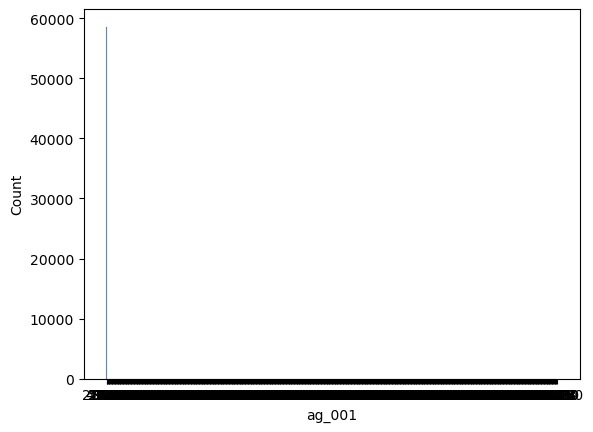

In [17]:
sns.histplot(air_systems_df['ag_001'])

In [18]:
# Function to calculate skewness and kurtosis for each column in the DataFrame
def calculate_skewness_kurtosis(df):
    results = {'Column': [], 'Skewness': [], 'Kurtosis': []}
    for col in df.columns:
        col_numeric = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
        results['Column'].append(col)
        results['Skewness'].append(skew(col_numeric.dropna(), nan_policy='omit'))
        results['Kurtosis'].append(kurtosis(col_numeric.dropna(), nan_policy='omit'))
    return pd.DataFrame(results)

In [19]:
calculate_skewness_kurtosis(air_systems_df)

/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1193: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/matheus/miniconda3/envs/steam-analysis/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1303: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/37

,Column,Skewness,Kurtosis
0,class,NaN,NaN
1,aa_000,6.115600,48.293316
2,ab_000,28.082185,1223.027496
3,ac_000,1.784798,1.185502
4,ad_000,212.452345,45133.999393
5,ae_000,90.585889,10760.494731
6,af_000,51.670422,3818.192562
7,ag_000,153.383677,24990.166445
8,ag_001,76.074125,7289.892539
9,ag_002,37.025285,1772.442843


In [20]:
air_systems_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,2161

In [21]:
air_systems_df.dropna(axis=1, thresh=(len(air_systems_df)*0.8), inplace=True)

In [23]:
df = air_systems_df.drop(columns='class').astype('float')

In [24]:
for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/700831849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/700831849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [25]:
from catboost import CatBoostClassifier
import tqdm

In [26]:
# Note: The dataset is very unbalanced, not adpating some of the algorithms to this fact may lead worse results.
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "CatBoosting": CatBoostClassifier(silent=True),
    "Support Vector Machine": SVC(class_weight="balanced"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(is_unbalance=True, verbose=-1),
    "Neural Network": MLPClassifier(max_iter=10000),
}

In [27]:
f1_scorer = make_scorer(f1_score, average="binary", zero_division=0)

In [28]:
def evaluate_classifiers(clf, X, y, cv_splits=5):
    scores = cross_val_score(clf, X, y, cv=cv_splits, scoring=f1_scorer)
    return scores

In [29]:
# Assuming df is your DataFrame
np.random.seed(42)  # For reproducibility
df['random_noise'] = np.random.normal(loc=0.0, scale=1.0, size=len(df))

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [179]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, air_systems_df['class'], test_size=0.2, random_state=42
)

In [180]:
y_train = y_train.replace({'neg': 0, 'pos': 1})

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_13441/3248636543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'neg': 0, 'pos': 1})


In [82]:
results = {}

for clf_name, clf in tqdm.tqdm(classifiers.items(), desc="Evaluating classifiers"):
    f1_scores = evaluate_classifiers(clf, scaled_data, y_train)
    results[clf_name] = f1_scores

Evaluating classifiers: 100%|██████████| 9/9 [06:37<00:00, 44.15s/it]


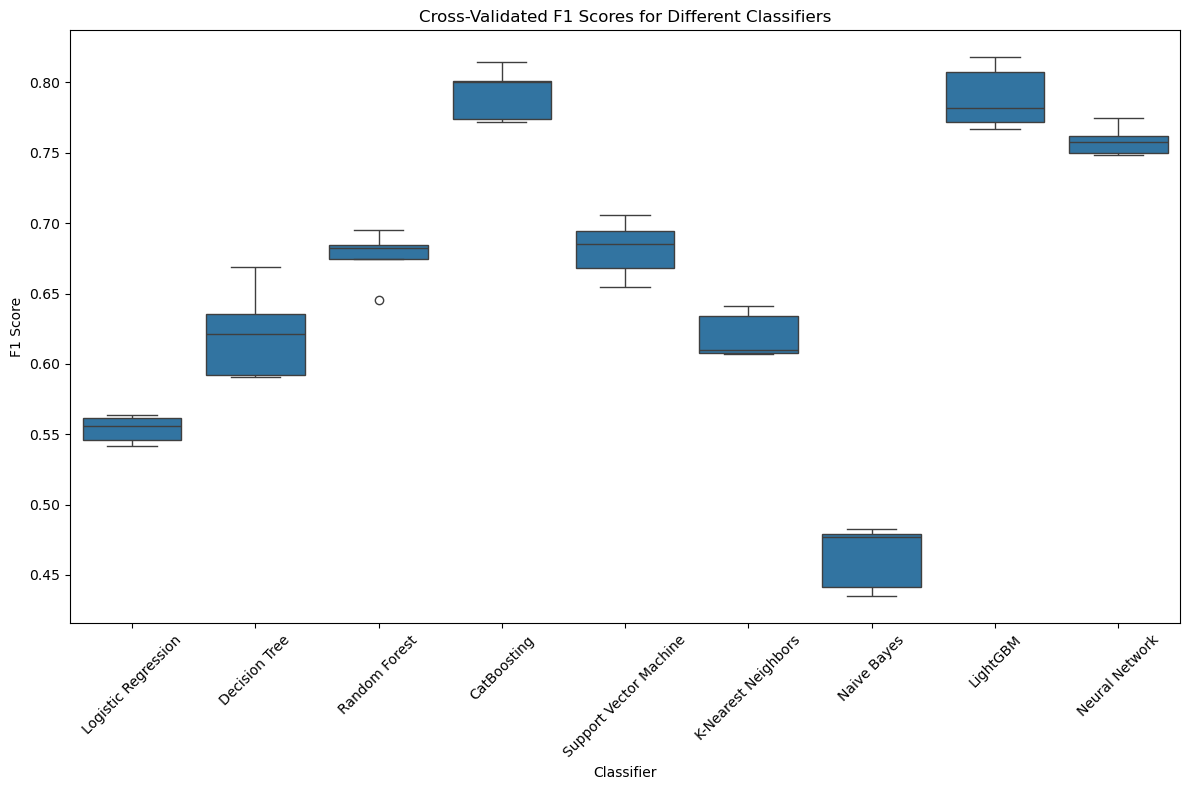

In [83]:
results_df = pd.DataFrame(results)
results_melted = results_df.melt(var_name="Classifier", value_name="F1 Score")

plt.figure(figsize=(12, 8))
sns.boxplot(x="Classifier", y="F1 Score", data=results_melted)
plt.title("Cross-Validated F1 Scores for Different Classifiers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [181]:
y_train = y_train.replace({'neg': 0, 'pos': 1})
y_test = y_test.replace({'neg': 0, 'pos': 1})

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_13441/3626633952.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'neg': 0, 'pos': 1})


In [182]:
cat_boost = CatBoostClassifier(silent=True, random_seed=42)
cat_boost.fit(X_train, y_train)

In [183]:
y_test.sum()

212

In [107]:
cat_boost.predict(X_test).sum()

173

In [185]:
f1_score(y_test, cat_boost.predict(X_test))


0.7780678851174935

In [186]:
result = permutation_importance(
    cat_boost,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=2,
    scoring=f1_scorer,
)

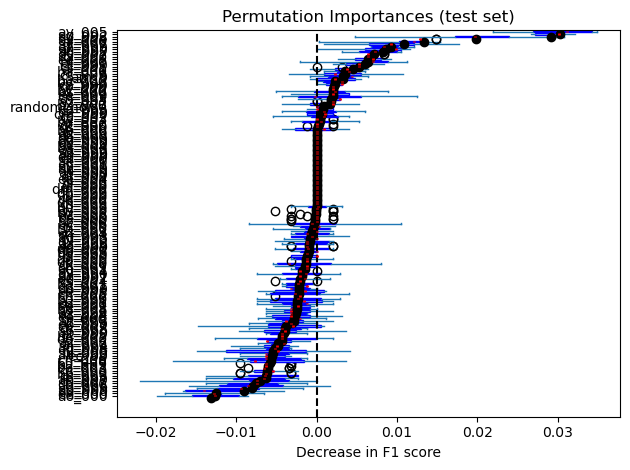

In [192]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=df.columns[sorted_importances_idx],
)

# Plot permutation importances
fig, ax = plt.subplots()
importances.plot.box(
    vert=False,
    whis=10,
    ax=ax,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red", linewidth=2),
    meanprops=dict(marker="o", markerfacecolor="black", markeredgecolor="black"),
)

# Adding a mean line
for i in range(importances.shape[1]):
    mean_value = importances.iloc[:, i].mean()
    ax.plot(mean_value, i, "o", color="black")
    
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in F1 score")
ax.figure.tight_layout()

plt.show()

In [193]:
importances['random_noise'].mean()

0.0008104873803307378

In [194]:
((importances.mean() > importances['random_noise'].mean()) == True).index

Index(['ao_000', 'ee_000', 'aq_000', 'ag_005', 'ag_006', 'cb_000', 'cs_007',
       'ah_000', 'cs_003', 'bb_000',
       ...
       'ay_002', 'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000',
       'ay_008', 'ag_002', 'ay_005'],
      dtype='object', length=147)

In [195]:
important_features_series = pd.Series((importances.mean() > importances['random_noise'].mean()))
important_features_series[important_features_series == True].index


Index(['bx_000', 'az_007', 'cs_005', 'cn_002', 'ee_009', 'bs_000', 'bv_000',
       'dr_000', 'ca_000', 'by_000', 'ba_000', 'am_0', 'cs_006', 'ba_006',
       'al_000', 'cs_001', 'cc_000', 'bt_000', 'ee_005', 'cj_000', 'ay_002',
       'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000', 'ay_008',
       'ag_002', 'ay_005'],
      dtype='object')

In [31]:
important_columns = ['bx_000', 'az_007', 'cs_005', 'cn_002', 'ee_009', 'bs_000', 'bv_000',
       'dr_000', 'ca_000', 'by_000', 'ba_000', 'am_0', 'cs_006', 'ba_006',
       'al_000', 'cs_001', 'cc_000', 'bt_000', 'ee_005', 'cj_000', 'ay_002',
       'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000', 'ay_008',
       'ag_002', 'ay_005']

In [35]:
filtered_air_systems_df = air_systems_df[important_columns]

In [36]:
scaler = StandardScaler()
filtered_scaled_data = scaler.fit_transform(filtered_air_systems_df)

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    filtered_scaled_data, air_systems_df['class'], test_size=0.2, random_state=42
)

In [38]:
y_train = y_train.replace({'neg': 0, 'pos': 1})
y_test = y_test.replace({'neg': 0, 'pos': 1})

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/3626633952.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'neg': 0, 'pos': 1})
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16056/3626633952.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'neg': 0, 'pos': 1})


In [202]:
filtered_cat_boost = CatBoostClassifier(silent=True, random_seed=42)
filtered_cat_boost.fit(X_train, y_train)

In [203]:
filtered_cat_boost.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [204]:
f1_score(y_test, filtered_cat_boost.predict(X_test))

0.8256410256410256

Optuna

In [39]:
import optuna

In [40]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'random_state': 42,
        'eval_metric': 'F1',
        'auto_class_weights': 'Balanced',  # Use balanced class weights for unbalanced classes
        'verbose': 0
    }
    
    # Initialize CatBoostClassifier with parameters
    model = CatBoostClassifier(**params)
    
    scoring = make_scorer(f1_score, average="binary")

    cv_score = cross_val_score(
        model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1
    )

    pruning_threshold = 0.80

    # Prune if the average F1 score is below the threshold
    if np.mean(cv_score) < pruning_threshold:
        raise optuna.exceptions.TrialPruned()

    # Log parameters and metrics with MLflow
    with mlflow.start_run(run_name=f"trial_{trial.number}"):
        mlflow.log_params(params)
        mlflow.log_metric("f1", np.mean(cv_score))
    return np.mean(cv_score)

In [41]:
study = optuna.create_study(
    direction="maximize", pruner=optuna.pruners.SuccessiveHalvingPruner()
)
study.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)

[I 2024-07-08 23:44:15,246] A new study created in memory with name: no-name-c7985989-6a18-4ce2-a7d9-f22cba6da74d
  1%|          | 1/100 [00:33<56:02, 33.97s/it]

[I 2024-07-08 23:44:49,244] Trial 1 pruned. 


  2%|▏         | 2/100 [00:56<44:21, 27.16s/it]

[I 2024-07-08 23:45:11,646] Trial 4 pruned. 


  3%|▎         | 3/100 [00:57<24:51, 15.38s/it]

[I 2024-07-08 23:45:12,938] Trial 2 pruned. 


  4%|▍         | 4/100 [02:20<1:07:28, 42.18s/it]

[I 2024-07-08 23:46:36,240] Trial 3 pruned. 


  5%|▌         | 5/100 [03:26<1:19:54, 50.47s/it]

[I 2024-07-08 23:47:41,420] Trial 5 pruned. 


  6%|▌         | 6/100 [03:48<1:04:05, 40.91s/it]

[I 2024-07-08 23:48:03,773] Trial 0 pruned. 


  7%|▋         | 7/100 [04:24<1:01:09, 39.46s/it]

[I 2024-07-08 23:48:40,251] Trial 8 pruned. 


  8%|▊         | 8/100 [04:28<43:01, 28.06s/it]  

[I 2024-07-08 23:48:43,910] Trial 6 pruned. 


  9%|▉         | 9/100 [04:44<36:54, 24.34s/it]

[I 2024-07-08 23:49:00,058] Trial 7 pruned. 


 10%|█         | 10/100 [05:10<37:18, 24.87s/it]

[I 2024-07-08 23:49:26,137] Trial 9 pruned. 


 11%|█         | 11/100 [06:38<1:05:28, 44.14s/it]

[I 2024-07-08 23:50:53,953] Trial 10 pruned. 
